# Project 2: Regression Challenge (HDB Prices)

## 04: Production Model and Insights

### Import Libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [2]:
# Set all columns and rows to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import Data

In [3]:
# Import the cleaned test data
hdb = pd.read_csv('../datasets/test_cleaned.csv')

In [4]:
# Take a quick look at the data
hdb.head()

,id,floor_area_sqm,mid,commercial,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,mall_nearest_distance,hawker_nearest_distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,lease_remaining_years,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,tranc_year_2013,tranc_year_2014,tranc_year_2015,tranc_year_2016,tranc_year_2017,tranc_year_2018,tranc_year_2019,tranc_year_2020,tranc_year_2021,tranc_month_2,tranc_month_3,tranc_month_4,tranc_month_5,tranc_month_6,tranc_month_7,tranc_month_8,tranc_month_9,tranc_month_10,tranc_month_11,tranc_month_12,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,114982,84.0,8,1,132,0,0,0,92,40,0,0,0,877.431572,687.576779,1,1,686.660434,0,0,75.683952,426.467910,156.322353,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,95653,112.0,5,0,53,0,0,0,28,25,0,0,0,534.037705,2122.346226,1,1,169.478175,0,0,88.993058,439.756851,739.371688,86,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,40303,68.0,8,0,218,0,0,191,22,1,1,0,0,817.050453,152.287621,1,1,694.220448,1,0,86.303575,355.882207,305.071191,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,109506,97.0,2,0,104,0,0,0,104,0,0,0,0,1272.737194,501.892158,1,1,1117.203587,0,0,108.459039,929.744711,433.454591,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,100149,103.0,17,0,144,0,0,0,48,96,0,0,0,1070.963675,437.593564,1,1,987.976010,0,0,113.645431,309.926934,217.295361,63,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
hdb.columns

Index(['id', 'floor_area_sqm', 'mid', 'commercial', 'total_dwelling_units',
       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold',
       'mall_nearest_distance', 'hawker_nearest_distance',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'bus_interchange', 'mrt_interchange', 'bus_stop_nearest_distance',
       'pri_sch_nearest_distance', 'sec_sch_nearest_dist',
       'lease_remaining_years', 'town_BEDOK', 'town_BISHAN',
       'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG',
       'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
       'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town

### Import the Standard Scaler

In [6]:
# Import the standard scaler that was previously fitted on the train dataset
ss = pickle.load(open('../datasets/standard_scaler.pkl', 'rb'))

In [7]:
# Check that the standard scaler was successfully imported
ss

StandardScaler()

### Import Production Model

Import the linear regression model with lasso regularization that was previously fitted on the train data

In [8]:
# Import the linear regression model with lasso regularization that was previously fitted on the train data
lasso_model = pickle.load(open('../datasets/lasso_model.pkl', 'rb'))

In [9]:
# Check that the model was successfully imported
lasso_model

Lasso(alpha=29.150530628251758)

#### Independent Features to load into the model

Let's create the X variable that will contain our independent features for the model

In [10]:
# Create X variable while removing the 'id' columns
X = hdb.drop(columns='id')

#### Scaling the data

In [11]:
# Use standard scaler to transform the data
X_ss = ss.transform(X)

#### Production Model

Let's run the production model on our test data.

In [12]:
# Predict using the model with the test dataset
hdb['Predicted'] = lasso_model.predict(X_ss)

#### Export predicted values to csv file for kaggle submission

In [13]:
# Create a kaggle dataframe with only the 'id' and 'predicted' columns
kaggle = round(hdb[['id', 'Predicted']], 0)

In [14]:
# Convert the predicted column to an integer
kaggle['Predicted'] = kaggle['Predicted'].astype(int);

In [15]:
# Quick look at the dataframe
kaggle.head()

,id,Predicted
0,114982,378613
1,95653,501220
2,40303,385006
3,109506,242108
4,100149,442446


In [16]:
# Export the kaggle submission data as a csv file
kaggle.to_csv('../datasets/kaggle_sub.csv', index=False)

#### Kaggle Submission

The kaggle submission gives us an RMSE score of approx. 48,000, which is in line with our test and validation scores. Hence, we know that the production model is performing as intended on unseen data, and did not overfit during the train and validation steps.

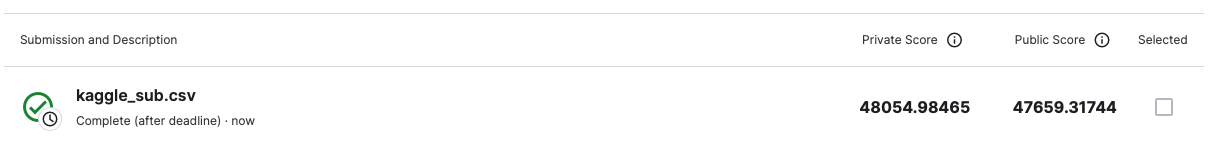

#### Insights 

In [17]:
# Tag the feature names to the respective coefficients
lasso_coeffs = pd.DataFrame({
    'Feature' : X.columns,
    'Coefficient' : lasso_model.coef_,
    'Absolute Coefficient' : np.abs(lasso_model.coef_)
})
# Sort the values by descending order
lasso_coeffs.sort_values('Coefficient', ascending=False)

,Feature,Coefficient,Absolute Coefficient
0,floor_area_sqm,82796.404499,82796.404499
22,lease_remaining_years,54195.912592,54195.912592
1,mid,23769.965267,23769.965267
26,town_BUKIT MERAH,17142.898622,17142.898622
37,town_MARINE PARADE,15708.122275,15708.122275
40,town_QUEENSTOWN,14079.076783,14079.076783
76,flat_model_DBSS,13006.325064,13006.325064
24,town_BISHAN,12084.586135,12084.586135
15,hawker_market_stalls,10359.456813,10359.456813
90,flat_model_Terrace,9883.631518,9883.631518


In [18]:
# Sort the coefficients in descending order
lasso_coeffs_sorted = lasso_coeffs.sort_values('Coefficient', ascending=False)

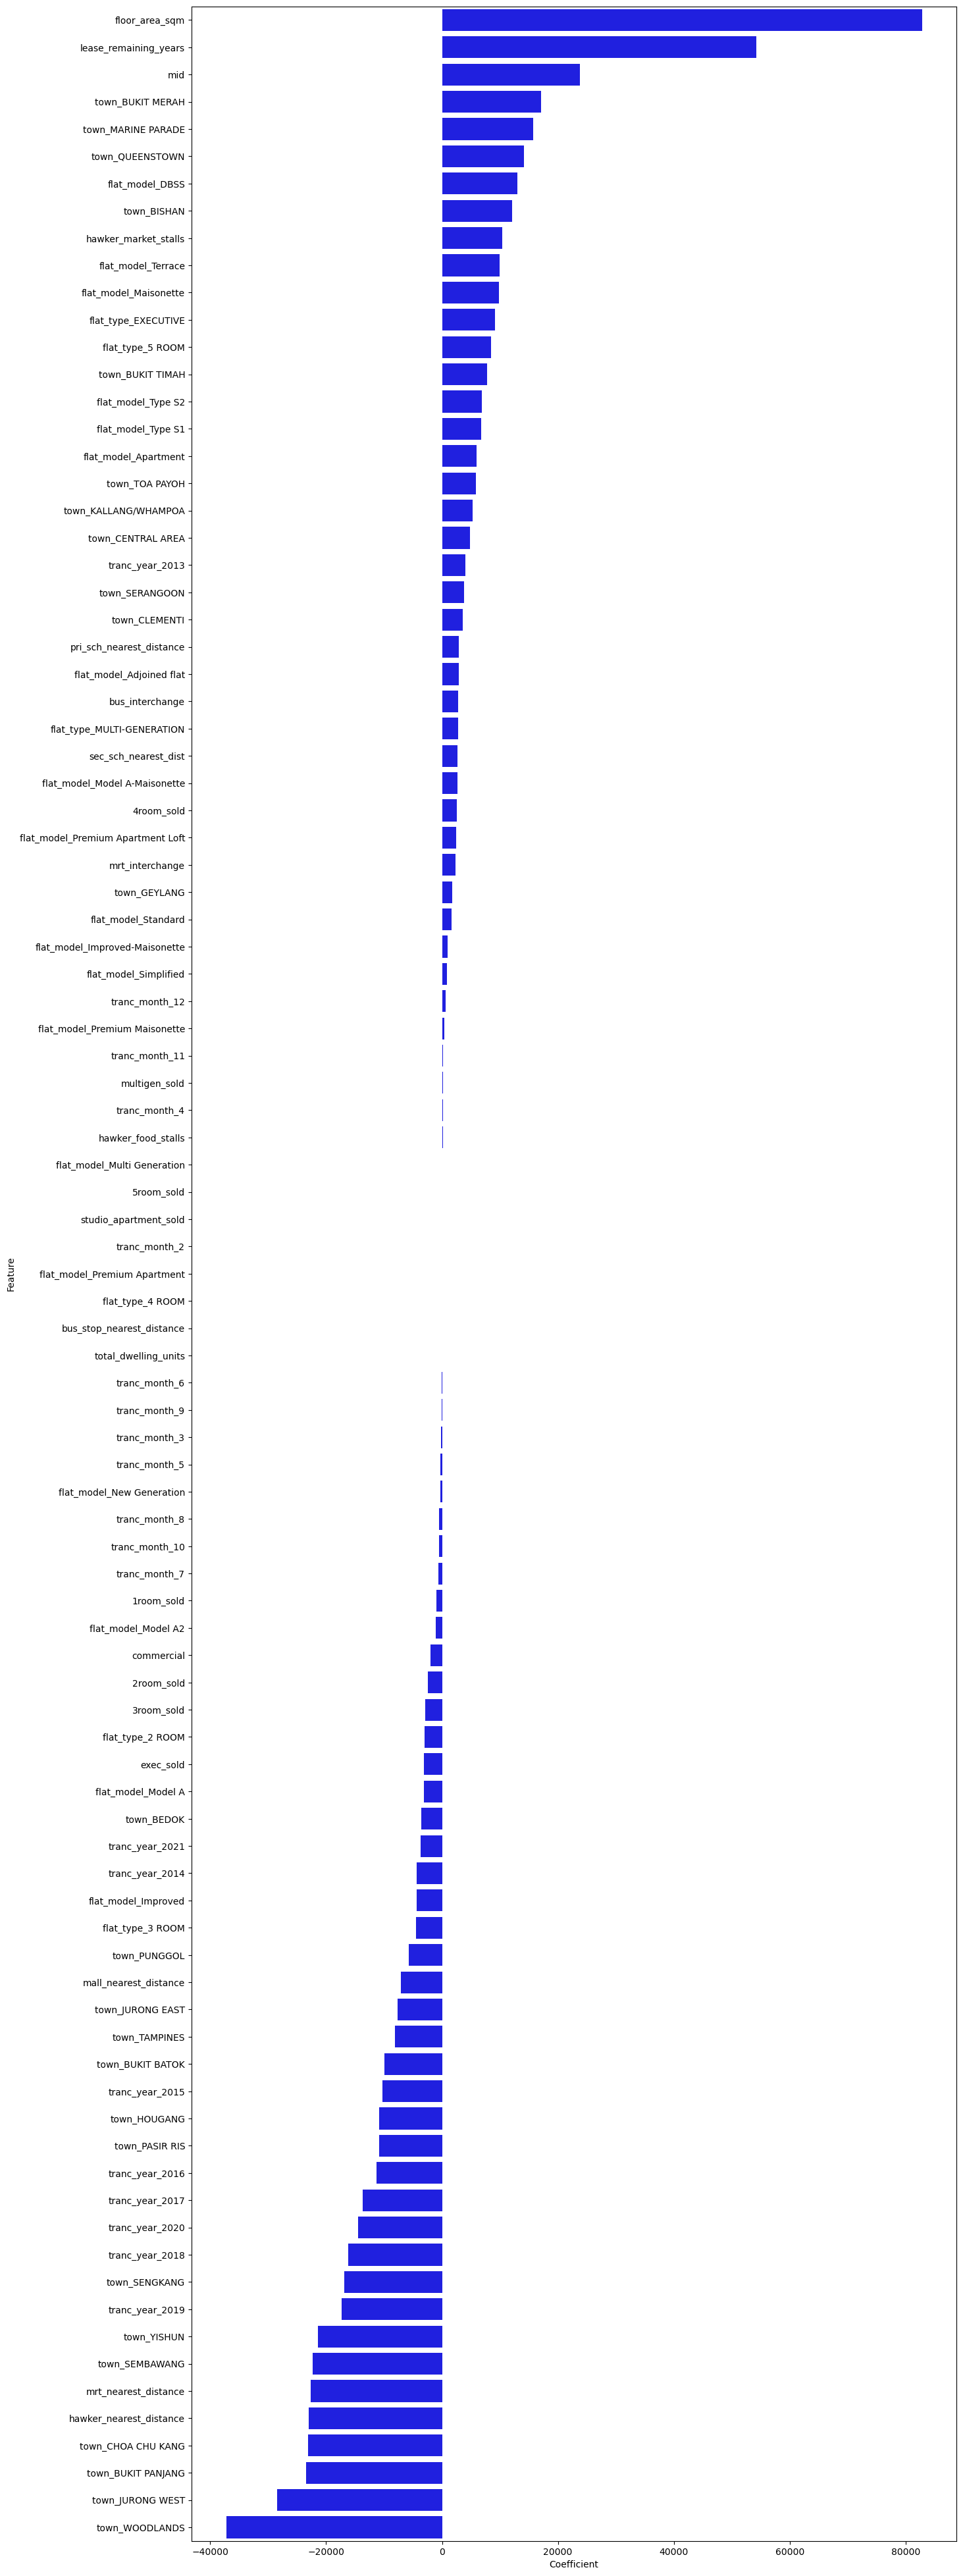

In [19]:
# Plot the coefficients in descending order
fix, ax = plt.subplots(figsize=(15,50))
sns.barplot(data=lasso_coeffs_sorted, x='Coefficient', y='Feature', orient='h', color='blue');

From the barplot above, we can easily see the coefficients of the features in descending order. For our analysis, we will look at the following:  
* Top 5 features that add the most value to a home 
* Top 5 features that hurts the value of a home the most  
* Other features of note
  
*For features that were one-hot encoded, we will consider the base column such as town or model as one feature, rather than the one-hot encoded features like town_xxx etc*

#### Top 5 features that add the most value to a home

The top 5 features identified are:
1. Floor area
2. Years left in the lease
3. Floor of the flat
4. Hawker Nearest Distance
5. MRT Nearest Distance

The top three features are not surprising and are commonly associated to prices for a flat in Singapore.  

**Floor area**  
It is common sense here that the more floor area is available, the higher the resale price will be. 

**Years left in the lease**    
As HDB flats in Singapore all come with a 99 year lease, it is understandable that the resale price of the flat will depreciate over time. As observed from the coefficient of the model, the longer the lease remaining, a higher resale price is commanded.

**Floor of the flat**    
As a matter of preference, many people prefer higher level flats. This could be due to the better view, increased privacy, more windy environment, and being less exposed to noise from the ground floor. Hence, the higher the flat, the higher the resale price.

**Hawker Nearest Distance**  
The high score probably represents the food culture in Singapore, where takeout is readily available at an affordable price and also shows the love of food here. Clearly, buyers are willing to pay a premium to be located near a Hawker Centre. With the work from home culture trending due to the pandemic, we can assume that Hawker Centres will continue to be a key factor as white collar workers working at home might not have the time to cook their lunch.   

*While this coefficient has a negative score, what it's actually saying is that the further the Hawker Centre is from the flat, the lesser the resale price. Inversely, it means that buyers are willing to pay more for a flat with a Hawker Centre nearby*

**MRT Nearest Distance**  
This coefficient stresses the unique situation in Singaore, where cars are incredibly unaffordable due to the high COE price. Due to that, majority of the public are forced to take the cheap and reliable public transportation network, primarily the MRT. Hence, it makes sense that people who require to travel daily for work or school would be willing to pay a higher price for the convenience of being located near an MRT station.


*While this coefficient has a negative score, what it's actually saying is that the further the MRT station is from the flat, the lesser the resale price. Inversely, it means that buyers are willing to pay more for a flat with an MRT station nearby*

#### Top 2 features that hurt the value of a home the most

Compared to the features that significantly increase the price of flats, there are only two groups of features that significantly hurt the value of a flat. There are:
1. Town
2. Transaction Year 

**Town**   
It is natural for the location of the estate to affect the resale price. Some locations are more convenient and better developed compared to others. From the model, we can see that towns like Bukit Merah, Marine Parade, Queenstown and Bishan are able to command higher prices compared to other lcoations. Inversely, we can see that towns such as Woodlands, Jurong West, Bukit Panjang, Choa Chu Kang, Sembawang and Yishun have negative effects to the price. A clear observation here is that towns in the West and North are not favored, possibly due to them being out of the way and far away from the central area of the island. 

**Transaction Year**  
From the coefficients for the different transaction years, we can see that certain years have a strong negative effect on the resale prices. In particular, the period between 2015 to 2019 had a big negative effect. One possible explanation for this is the property cooling measures that were introduced in 2013 which kept property prices down. 

#### Other Features of Note

*This also includes insights on features that were dropped earlier during the model tuning process*

**Primary and Secondary School Distance**    
It is interesting to note that the distance to schools are not significant features, despite families moving homes to ensure their kids are eligible for good schools. One possible explanation here is that families might only need the school of their choice within the town. Distance might not be important to them due to the efficient, reliable and safe public transport network available. 

**Flat Types and Models**  
Flat types and models do not seem to be strong indicators for the resale price. One explanation for this could be that most buyers would rather look at the size of the flat (i.e. floor area) and use that to determine their needs. However, one interesting coefficient to note is on the feature for flat model DBSS, which has a rather high coefficient. This could be due to the flat model's unique characteristics compared to a traditional HDB. The DBSS (Developed by Sellers) flat was introduced in 2005 and discontinued in 2011. These flats were build by private developers and sold by HDB. What seperates the DBSS flat from condos and HDBs was that they were developed as condo apartments, but without the facilities a condo would have (e.g. pool, gym, etc). One assumption here could be that buyers are keen to live in a condo apartment, but are unwilling to pay for the extra facilities that come with a condo, especially since there are many such public facilities available for cheap. Since this flat model is discontinued, it's availablitiy is lacking, which could also drive up its price. 

**Bus Stop Nearest Distance**  
It is interesting that the model penalized the bus stop nearest distance coefficient to zero. This means that the model has deemed this feature having no impact on the price of the flat. This could be because buyers are more focused on purchasing flats near MRT stations, as shown by the strong coefficient on MRT nearest distance. This is also in line with the Land Transport Authority's plan to continue beefing up the MRT network to ensure that majority of flats are located walking distnace to an MRT station. With the ease of access and convenience of the MRT network, buses might not be a favored option, especially since bus timing might not be regular due to being affected by traffic conditions.  

#### Recommendations

From the analysis above, we have narrowed the initial list of 77 features into approximately 7 features that have a strong impact to the resale price. When trying to predict HDB resale prices, these features are the ones to focus on. In particular, we should look at the floor area of the flat, the years remaining in the lease, the floor level of the flat, and how far important amenities like a hawker centre and MRT station are. 

Based on the results and its analysis, the following improvements could also be made on the model:
* The distance to important amenitites could be misleading as there might not be a direct route. Hence, we can consider using travel time instead
* We can consider the  number of new flats that finish their minimum occupancy period (MOP) per year. This gives us a sensing of how many new flats are entering the resale market that year, affecting the supply.
* The model has shown that the number of years remaining in the lease is a very significant feature. We also know that the value of a house appreciate over time, but eventually the value could start to decrease due to the depreciation of the lease. We should investigate further at which point does the depreciation become significant and starts lowering the price of the flat
